In [22]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
df_heart_attack=pd.read_csv('heart.csv')


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:
df_heart_attack.drop(columns=['slp','caa','thall'],inplace=True)
df_heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  output    303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


categorical data:sex,cp,fbs,restecg,exng
numerical data:age,trtbps,chol,thalachh,oldpeak
target:output

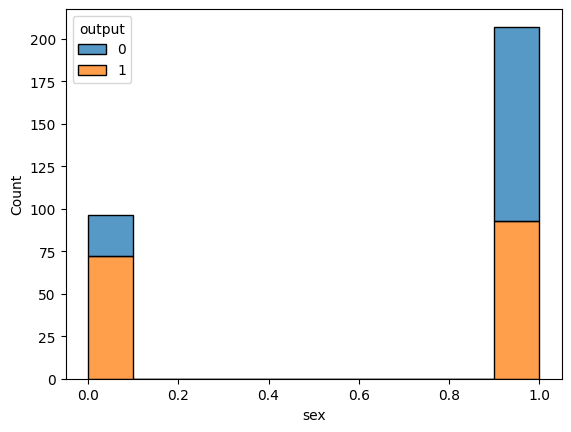

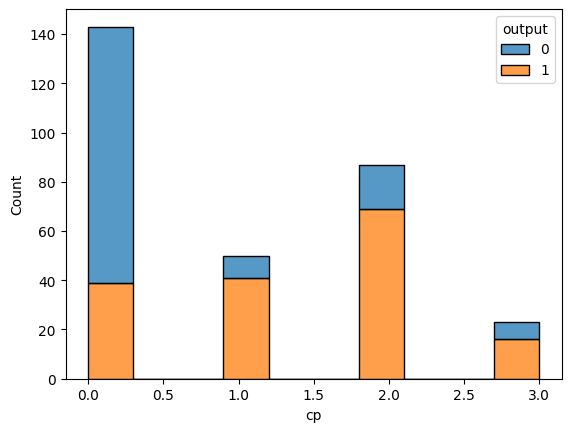

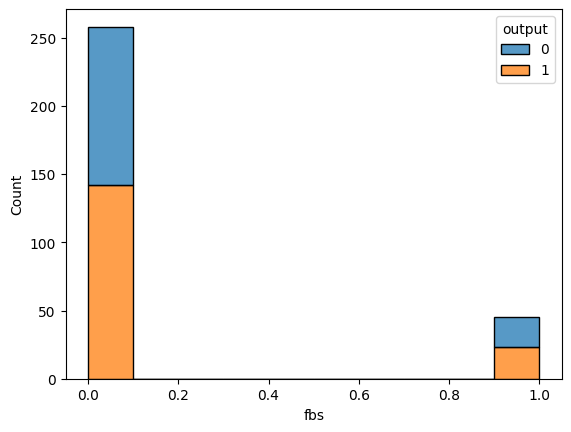

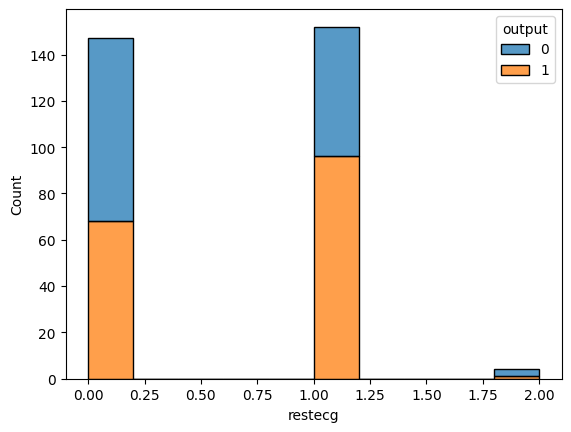

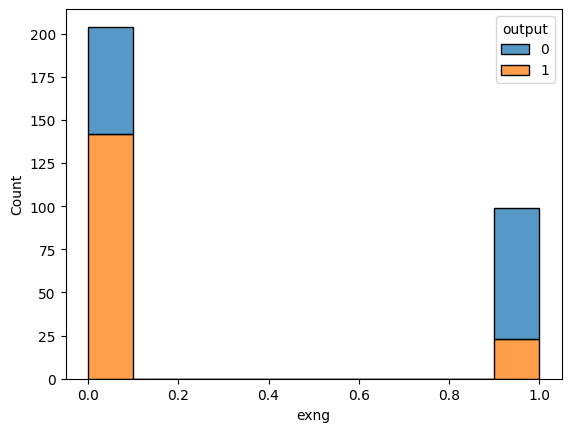

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
cat_var=['sex','cp','fbs','restecg','exng']
for item in cat_var:
    sns.histplot(data=df_heart_attack,x=item,hue='output',multiple='stack')
    plt.show()

<AxesSubplot:xlabel='age_bins', ylabel='count'>

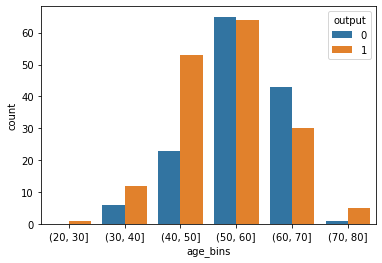

In [117]:
df_heart_attack['age_bins']=pd.cut(x=df_heart_attack['age'],bins=[20,30,40,50,60,70,80])
sns.countplot(data=df_heart_attack,x='age_bins',hue='output')

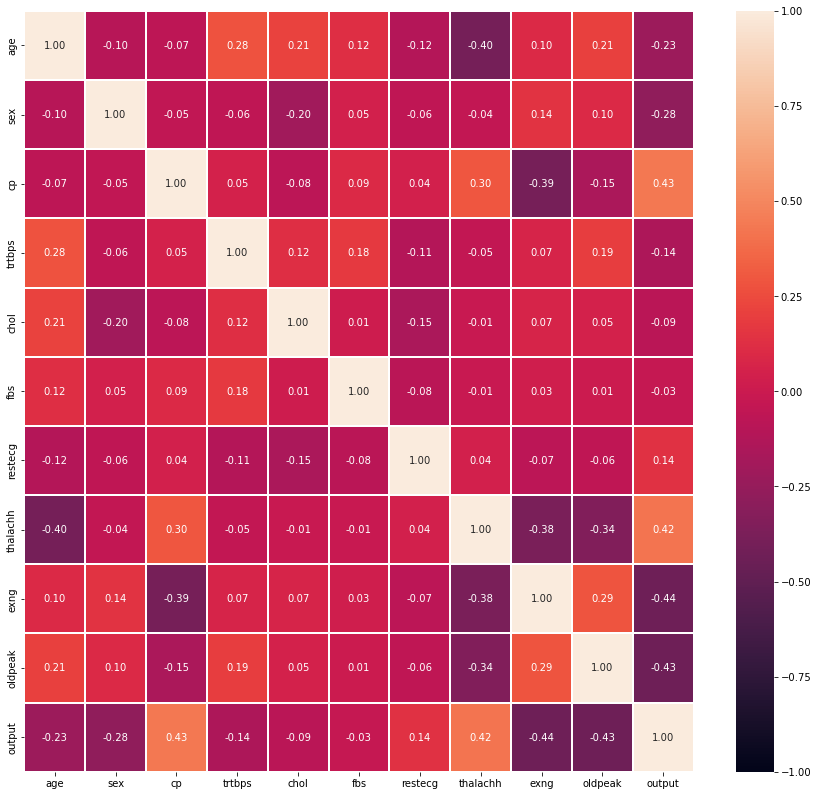

In [118]:
plt.figure(figsize=(15,14))
corr=df_heart_attack.corr()
sns.heatmap(corr,annot=True,linewidths=0.1, vmin=-1, vmax=1,fmt=".2f");
#numerical data:age,trtbps,chol,thalachh,oldpeak
#this df.corr() is not so meaningful for categorical variables even though they have decoded as numbers (such as sex: male is 0, female is 1).It's mostly meaningful for numerical variables
# but we can still do statistical test to analyze the relationship between numerical variables and target variables.

In [112]:
df_heart_attack.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.430696


In [9]:
#chi-square test,using chi-square test is because target variable is also catgorical, so this test is  for analyzing the association or independence between categorical variables.
target_var='output'
cat_var=['sex','cp','fbs','restecg','exng']
from scipy.stats import chi2_contingency
def chi_square_test (df,catgorical_variable,target):
    for i in catgorical_variable:
        contingency_table=pd.crosstab(df[i],df[target])
        chi2,p,dof,expected=chi2_contingency(contingency_table)
        print(f"chi-squared test for {i}")
        print("chi-squared:", chi2)
        print("p-values: ",p)


chi_square_test(df_heart_attack,cat_var,target_var)
#if p<0.05, reject null hypothesis(null: no relationship between the two variables)
#there is relationship between variables and target(p<0.05): sex,cp,restecg,exng

chi-squared test for sex
chi-squared: 22.717227046576355
p-values:  1.8767776216941503e-06
chi-squared test for cp
chi-squared: 81.68642755194445
p-values:  1.3343043373050064e-17
chi-squared test for fbs
chi-squared: 0.10627276301947715
p-values:  0.7444281114149577
chi-squared test for restecg
chi-squared: 10.023091785081
p-values:  0.006660598773498031
chi-squared test for exng
chi-squared: 55.94454996665093
p-values:  7.454409331235655e-14


In [10]:
#use independent sample t-test for numerical variables(also called two-sample t-test),independent-samples t tests compare 
#scores on the same variable but for two different groups of cases.(in our case we have output as two groups 0 and 1)
#Paired-samples t tests compare scores on two different variables but for the same group of cases;
num_var=['age','trtbps','chol','thalachh','oldpeak']
import scipy.stats as stats
stats.ttest_ind(df_heart_attack['thalachh'],df_heart_attack['output'])
def t_test_numerical_var (df,numerical_variable,target):
    for i in numerical_variable:
        statistic,p=stats.ttest_ind(df[i],df[target])
        print(f"t test for {i}")
        print("t-statistic:", statistic)
        print("p-values: ",p)

t_test_numerical_var(df_heart_attack,num_var,target_var)
#seems all related to target, but oldpeak is the most related one, which achieves the same results by using df.corr()

t test for age
t-statistic: 103.00041313916304
p-values:  0.0
t test for trtbps
t-statistic: 130.04567710371225
p-values:  0.0
t test for chol
t-statistic: 82.51887021442299
p-values:  0.0
t test for thalachh
t-statistic: 113.28420699155801
p-values:  0.0
t test for oldpeak
t-statistic: 6.819096267644434
p-values:  2.2270855709915056e-11


In [11]:
# use logistic regression to check the relationship between numerical variables and target, mainly look at the coefficient
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df_heart_attack[['sex','cp','fbs','restecg','exng','age','trtbps','chol','thalachh','oldpeak']]
y=df_heart_attack[target_var]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
model.coef_
#achieve the same result as chi-square and t-test

c:\Users\Guanyi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-1.55328458e+00,  8.22628201e-01, -8.45731939e-02,
         4.25586017e-01, -9.07363733e-01, -1.59104471e-02,
        -1.01556661e-02, -1.33563820e-03,  2.53488945e-02,
        -8.30890058e-01]])

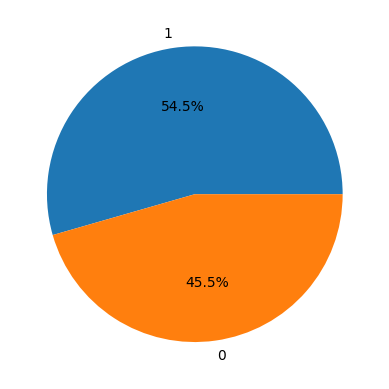

In [12]:
#check data balance, if data is unblanced, then accuracy score is not recommended to evaluate machine learning models later and also
#will neeed to stratify the data in train-test-split,use "stratify=y"
label=df_heart_attack['output'].value_counts().index
plt.pie(df_heart_attack['output'].value_counts(),labels=label,autopct='%.1f%%')
plt.show();

In [13]:
#detect outliers using z_score for numerical method
#z score is better method to handle outliers if the data is nearly Gaussin distribution,but when it's skewed, use IQR method
#below code defines two functions correspondingly for z_score and IQR method
def detect_outliers(data):
    outliers = []
    z_threshold = 3
    mean = np.mean(data)
    std_dev = np.std(data)
    for i in data:
        z_score = (i - mean) / std_dev
        if np.abs(z_score) > z_threshold:
            outliers.append(i)
    return outliers

In [14]:
num_var=['age','trtbps','chol','thalachh','oldpeak']
for item in num_var:
    outliers=detect_outliers(df_heart_attack[item])
    print(f'outliers in {item} : {outliers}')

outliers in age : []
outliers in trtbps : [200, 192]
outliers in chol : [417, 564, 407, 409]
outliers in thalachh : [71]
outliers in oldpeak : [6.2, 5.6]


c:\Users\Guanyi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


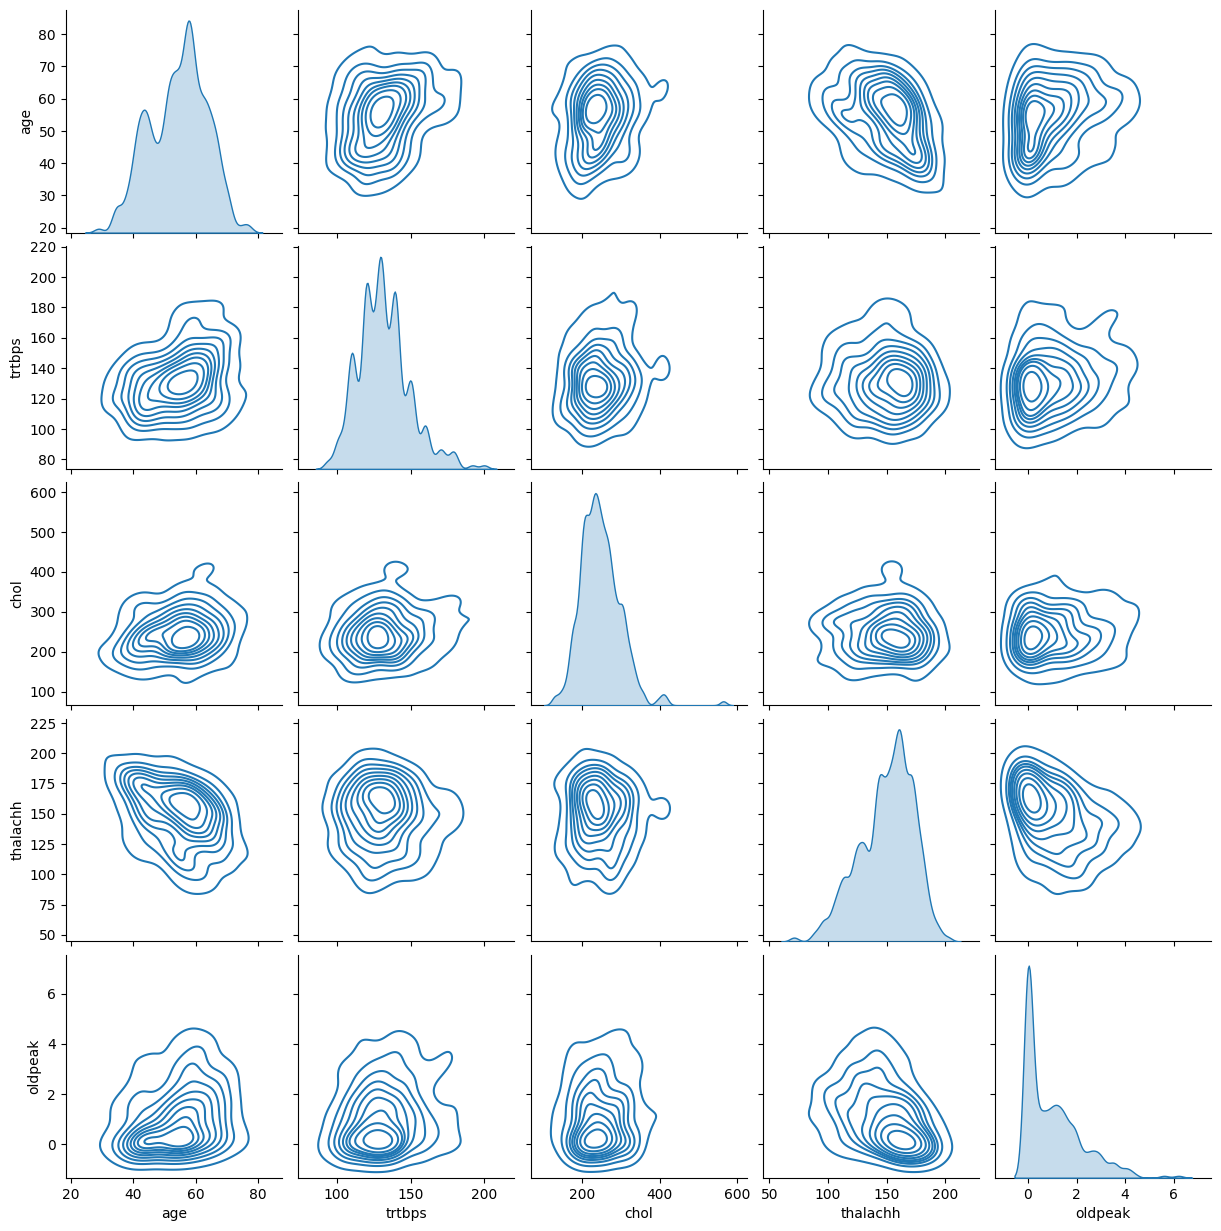

In [15]:
import seaborn as sns
num_var=['age','trtbps','chol','thalachh','oldpeak']
sns.pairplot(df_heart_attack[num_var],diag_kws={'bw_adjust': 0.5}, kind='kde')
#it doesn't seem like the variables in num_var follows Gaussin distribution.

In [16]:
#except data visualization, this is another technique to see the data distribution, mainly check if it's skewed.
#mean>median,right_skewed;mean<median,left_skewed(got a long tail at the left)
print(np.mean(df_heart_attack['age']))
print(np.median(df_heart_attack['age']))
print(np.mean(df_heart_attack['trtbps']))
print(np.median(df_heart_attack['trtbps']))
print(np.mean(df_heart_attack['chol']))
print(np.median(df_heart_attack['chol']))
print(np.mean(df_heart_attack['thalachh']))
print(np.median(df_heart_attack['thalachh']))
print(np.mean(df_heart_attack['oldpeak']))
print(np.median(df_heart_attack['oldpeak']))

54.366336633663366
55.0
131.62376237623764
130.0
246.26402640264027
240.0
149.64686468646866
153.0
1.0396039603960396
0.8


In [23]:
def detect_outliers_iqr(data):
    outliers=[]
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    for i in range(len(data)):
        if(data[i]<lwr_bound or data[i]>upr_bound):
            outliers.append(i)
    return outliers


In [24]:
for j in num_var:
    outliers_iqr_indices=detect_outliers_iqr(df_heart_attack[j])
    ##print(f'outliers in {j} : {outliers_iqr}')---as we can see, it detects more outliers in oldpeak, because from above plot,oldpeak is skewed data
    df_heart_attack=df_heart_attack.drop(outliers_iqr_indices)  #remove outliers

data preprocessing:
1.variable bucket: onehotencode for cat_vat, minmaxscaler for num_var.Some ML algorithms are very sensitive to the scale of input features(such as knn,svm and gradient descent-based optimization algorithms), but like Desisions are not sensitive to scales. However, we will apply scaling to all numerical variables.

2.Even though in the orignal dataset, cat_var are presented by numbers,but I am still
doing one hot encoding here just to avoid machine learning models' misuderstand the numbers as some kind of sequency/measurements

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [52]:
cat_var=['sex','cp','fbs','restecg','exng']
num_var=['age','trtbps','chol','thalachh','oldpeak']
target=['output']
features=[a for a in df_heart_attack.columns if a not in target]
X=df_heart_attack[features]
y=df_heart_attack[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
pipe_cat=Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore'))])
pipe_num=Pipeline([('scale',MinMaxScaler(feature_range=(0,1)))])
pipe_full=ColumnTransformer([('cat',pipe_cat,cat_var),('num',pipe_num,num_var)])
pipe_full.fit(X_train)
X_train_trans=pipe_full.transform(X_train)  #fit and transform X_train
X_test_trans=pipe_full.transform(X_test)    #only transform X_test
#no fit or transform for target variables

A good interview question:
why when building pipeline, fit transform X_train but only transform X_test?

When building a machine learning pipeline, it's common practice to use the fit_transform method on the training data (X_train) for certain preprocessing steps and then use the transform method on the test data (X_test). This approach is followed for several important reasons:

Preventing Data Leakage: The primary reason is to prevent data leakage from the test set into the training process. In machine learning, the goal is to create a model that can generalize well to unseen data. If you apply certain preprocessing steps (e.g., scaling, feature engineering) to both the training and test data simultaneously, the model may inadvertently learn information from the test set during the training process. This can lead to overly optimistic performance estimates and a model that doesn't generalize well to new, unseen data.

In [29]:
pipe_full.named_transformers_

{'cat': Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]),
 'num': Pipeline(steps=[('scale', MinMaxScaler())]),
 'remainder': 'drop'}

In [53]:
import warnings
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
lsvc=LinearSVC(C=1,loss='squared_hinge')
lsvc.fit(X_train_trans,y_train)
y_pred=lsvc.predict(X_test_trans)
cv_scores=cross_val_score(lsvc,X_train_trans,y_train,cv=5)
accuracy = accuracy_score(y_test, y_pred)
print(cv_scores.mean())
print(accuracy)
cr=classification_report(y_test,y_pred)
print(cr)
# predict disease we care more about recall.
# this is using all input features.Try only using the highly related variables from above code then check the model performance again
# or try different ML models
# or try hyperparameter tuning.

0.7748792270531402
0.9122807017543859
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.94      0.91      0.92        33

    accuracy                           0.91        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [54]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_dist={'C':[0.1,1,10,20],'loss':['hinge','squared_hinge']}
grid_search=GridSearchCV(lsvc,param_dist,cv=5,scoring='recall')
random_cv=RandomizedSearchCV(lsvc,param_dist,cv=5,scoring='recall')
grid_search.fit(X_train_trans,y_train)
random_cv.fit(X_train_trans,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(random_cv.best_estimator_)
print(random_cv.best_score_)

{'C': 0.1, 'loss': 'hinge'}
0.8928774928774927
LinearSVC(C=0.1, loss='hinge')
0.8928774928774927


In [59]:
#try another algorithm knn, knn works well when you have a relatively small to medium sized datasets with a moderate number of features
from sklearn.neighbors import KNeighborsClassifier 
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_trans,y_train)
y_pred_knn=knn_model.predict(X_test_trans)
cv_scores_knn=cross_val_score(knn_model,X_train_trans,y_train,cv=5)
cr_knn=classification_report(y_test,y_pred_knn)
print(cr_knn)
print(cv_scores_knn.mean())


              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.83      0.91      0.87        33

    accuracy                           0.84        57
   macro avg       0.85      0.83      0.83        57
weighted avg       0.84      0.84      0.84        57

0.7618357487922706


In [41]:
param_knn={'n_neighbors':np.arange(2,10,1)}
random_knn=RandomizedSearchCV(knn_model,param_knn,cv=5,scoring='recall')
random_knn.fit(X_train_trans,y_train)
print(random_knn.best_estimator_)
print(random_knn.best_score_)

KNeighborsClassifier(n_neighbors=7)
0.8427350427350427


the best_score_ is the mean cross=validated score of the best_estimator.It doesn't mean when you use the best_parameters in your original model, the performance metrics will  achieve the best performance(eg:recall in this case), this is due to the train test split process is random, so that's why the cross validation score is more meaningful to measure the model.